<a href="https://colab.research.google.com/github/xlrboi/loan_status_prediction/blob/main/loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv('/content/loan_prediction.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.shape

(614, 13)

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [11]:
df=df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
484,LP002543,Male,Yes,2,Graduate,No,8333,0.0,246.0,360.0,1.0,Semiurban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
150,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N
244,LP001811,Male,Yes,0,Not Graduate,No,3406,4417.0,123.0,360.0,1.0,Semiurban,Y


In [15]:
df.columns=df.columns.str.lower()

In [16]:
df['dependents'].value_counts()

,count
dependents,
0,274
2,85
1,80
3+,41


In [17]:
df['dependents']=df['dependents'].replace('3+',4).astype(int)

/tmp/ipython-input-951048996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dependents']=df['dependents'].replace('3+',4).astype(int)


In [18]:
df['dependents'].value_counts()

,count
dependents,
0,274
2,85
1,80
4,41


In [19]:
df.drop('loan_id',axis=1,inplace=True)

/tmp/ipython-input-497757094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('loan_id',axis=1,inplace=True)


In [20]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


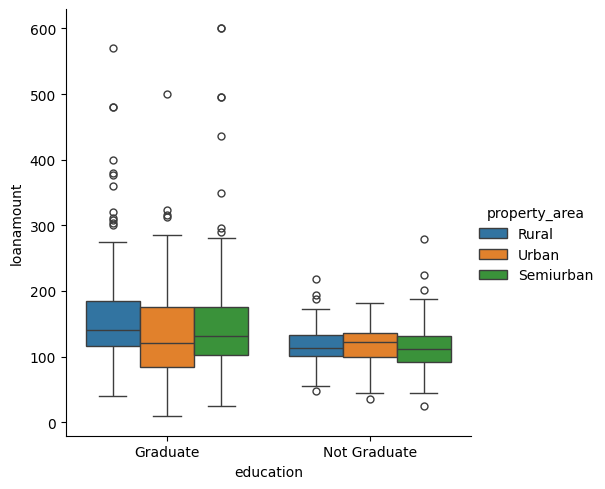

In [21]:
sns.catplot(
    data=df,
    x='education',
    y='loanamount',
    hue='property_area',
    kind='box'
)

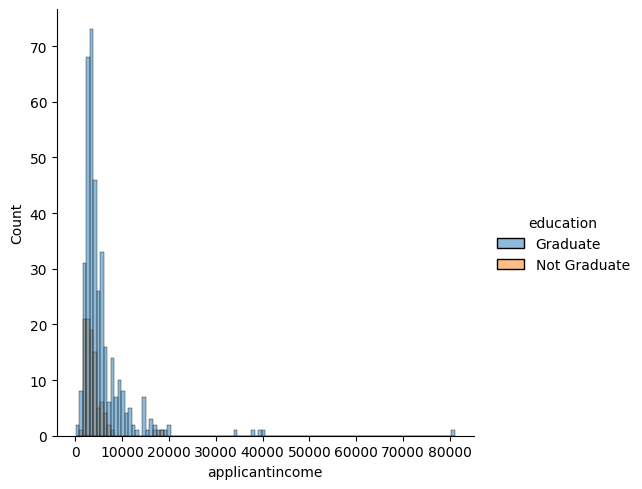

In [22]:
import seaborn as sns
sns.displot(data=df,x='applicantincome',hue='education',kind='hist')

<Axes: xlabel='education', ylabel='count'>

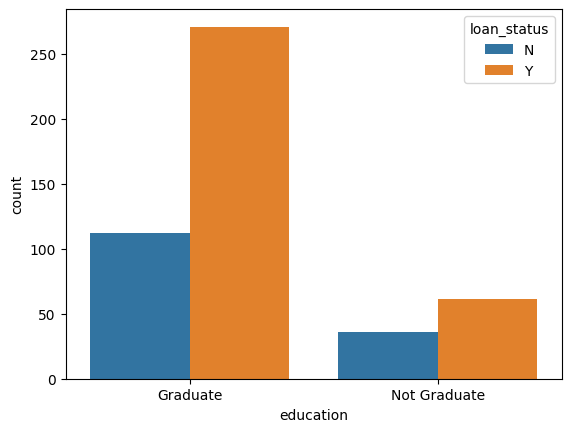

In [23]:
sns.countplot(data=df,x='education',hue='loan_status')

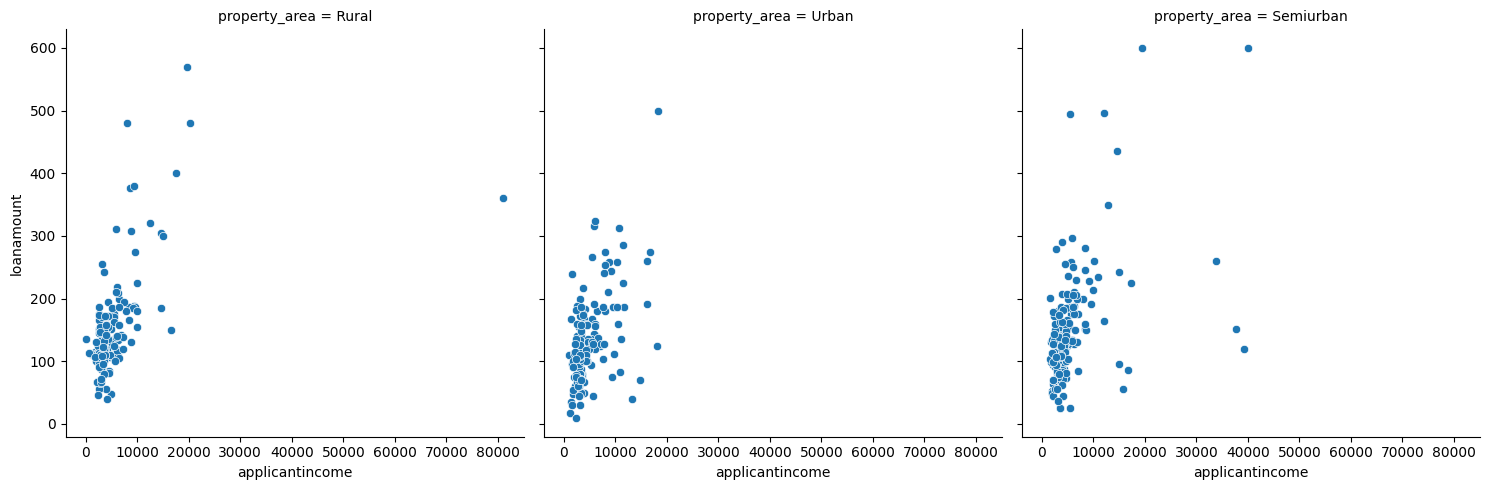

In [24]:
sns.relplot(data=df,x='applicantincome',y='loanamount',col='property_area',kind='scatter')

In [25]:
cols=['gender','married','education','self_employed','property_area']
for i in cols:
  print(df[i].value_counts())

gender
Male      394
Female     86
Name: count, dtype: int64
married
Yes    311
No     169
Name: count, dtype: int64
education
Graduate        383
Not Graduate     97
Name: count, dtype: int64
self_employed
No     414
Yes     66
Name: count, dtype: int64
property_area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64


In [26]:
df.replace({'loan_status':{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-3748943000.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'loan_status':{'N':0,'Y':1}},inplace=True)
/tmp/ipython-input-3748943000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'loan_status':{'N':0,'Y':1}},inplace=True)


In [27]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
transformer=ColumnTransformer([
    ('tnf1',OrdinalEncoder(categories=[["Graduate",'Not Graduate'],['Urban','Semiurban','Rural']]),['education','property_area'])
],remainder='passthrough')

In [41]:
oe = transformer.named_transformers_['tnf1']

# Show mappings
for col_name, categories in zip(['education', 'property_area'], oe.categories_):
    print(f"\nColumn: {col_name}")
    for i, cat in enumerate(categories):
        print(f"{cat} → {i}")


Column: education
Graduate → 0
Not Graduate → 1

Column: property_area
Urban → 0
Semiurban → 1
Rural → 2


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('loan_status',axis=1),df['loan_status'],test_size=0.2,random_state=42)

In [70]:
X_train.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
172,1,1,4,Not Graduate,0,3522,0.0,81.0,180.0,1.0,Rural
288,0,0,0,Graduate,0,4124,0.0,115.0,360.0,1.0,Semiurban
607,1,1,2,Not Graduate,0,3987,1411.0,157.0,360.0,1.0,Rural
55,1,1,2,Graduate,0,2708,1167.0,97.0,360.0,1.0,Semiurban
461,1,1,4,Graduate,0,7740,0.0,128.0,180.0,1.0,Urban


In [30]:
cols=['gender','married','self_employed']
for cols in cols:
  le=LabelEncoder()
  X_train[cols]=le.fit_transform(X_train[cols])
  X_test[cols]=le.transform(X_test[cols])

In [31]:
X_train_trans=transformer.fit_transform(X_train)

In [32]:
X_test_trans=transformer.transform(X_test)

In [37]:
X_train_df=pd.DataFrame(X_train_trans,columns=transformer.get_feature_names_out())
X_train_df

,tnf1__education,tnf1__property_area,remainder__gender,remainder__married,remainder__dependents,remainder__self_employed,remainder__applicantincome,remainder__coapplicantincome,remainder__loanamount,remainder__loan_amount_term,remainder__credit_history
0,1.0,2.0,1.0,1.0,4.0,0.0,3522.0,0.000000,81.0,180.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,4124.0,0.000000,115.0,360.0,1.0
2,1.0,2.0,1.0,1.0,2.0,0.0,3987.0,1411.000000,157.0,360.0,1.0
3,0.0,1.0,1.0,1.0,2.0,0.0,2708.0,1167.000000,97.0,360.0,1.0
4,0.0,0.0,1.0,1.0,4.0,0.0,7740.0,0.000000,128.0,180.0,1.0
5,1.0,1.0,1.0,1.0,2.0,0.0,2192.0,1742.000000,45.0,360.0,1.0
6,0.0,0.0,1.0,1.0,1.0,0.0,6400.0,7250.000000,180.0,360.0,0.0
7,0.0,2.0,1.0,1.0,1.0,0.0,4283.0,3000.000000,172.0,84.0,1.0
8,0.0,1.0,1.0,1.0,2.0,0.0,4708.0,1387.000000,150.0,360.0,1.0
9,1.0,0.0,1.0,1.0,1.0,0.0,6608.0,0.000000,137.0,180.0,1.0


In [38]:
X_test_df=pd.DataFrame(X_test_trans,columns=transformer.get_feature_names_out())
X_test_df

,tnf1__education,tnf1__property_area,remainder__gender,remainder__married,remainder__dependents,remainder__self_employed,remainder__applicantincome,remainder__coapplicantincome,remainder__loanamount,remainder__loan_amount_term,remainder__credit_history
0,1.0,0.0,1.0,1.0,2.0,0.0,3273.0,1820.0,81.0,360.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,6783.0,0.0,130.0,360.0,1.0
2,0.0,2.0,1.0,1.0,2.0,0.0,3510.0,4416.0,243.0,360.0,1.0
3,1.0,0.0,1.0,1.0,0.0,0.0,3000.0,1666.0,100.0,480.0,0.0
4,0.0,0.0,1.0,1.0,2.0,0.0,3283.0,2035.0,148.0,360.0,1.0
5,0.0,0.0,1.0,1.0,0.0,0.0,2221.0,0.0,60.0,360.0,0.0
6,1.0,0.0,1.0,1.0,2.0,0.0,3083.0,2168.0,126.0,360.0,1.0
7,0.0,1.0,1.0,1.0,0.0,0.0,2083.0,3150.0,128.0,360.0,1.0
8,0.0,1.0,1.0,1.0,0.0,0.0,1977.0,997.0,50.0,360.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,3333.0,0.0,70.0,360.0,1.0


In [43]:
X_train_df.head()

,tnf1__education,tnf1__property_area,remainder__gender,remainder__married,remainder__dependents,remainder__self_employed,remainder__applicantincome,remainder__coapplicantincome,remainder__loanamount,remainder__loan_amount_term,remainder__credit_history
0,1.0,2.0,1.0,1.0,4.0,0.0,3522.0,0.0,81.0,180.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,4124.0,0.0,115.0,360.0,1.0
2,1.0,2.0,1.0,1.0,2.0,0.0,3987.0,1411.0,157.0,360.0,1.0
3,0.0,1.0,1.0,1.0,2.0,0.0,2708.0,1167.0,97.0,360.0,1.0
4,0.0,0.0,1.0,1.0,4.0,0.0,7740.0,0.0,128.0,180.0,1.0


In [44]:
to_scale=['remainder__applicantincome','remainder__coapplicantincome','remainder__loanamount','remainder__loan_amount_term']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_df[to_scale]=scaler.fit_transform(X_train_df[to_scale])
X_test_df[to_scale]=scaler.transform(X_test_df[to_scale])

In [45]:
X_train_df.head(15)

,tnf1__education,tnf1__property_area,remainder__gender,remainder__married,remainder__dependents,remainder__self_employed,remainder__applicantincome,remainder__coapplicantincome,remainder__loanamount,remainder__loan_amount_term,remainder__credit_history
0,1.0,2.0,1.0,1.0,4.0,0.0,-0.310457,-0.590022,-0.809935,-2.397575,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,-0.211548,-0.590022,-0.370210,0.280345,1.0
2,1.0,2.0,1.0,1.0,2.0,0.0,-0.234057,-0.080986,0.172980,0.280345,1.0
3,0.0,1.0,1.0,1.0,2.0,0.0,-0.444196,-0.169012,-0.603005,0.280345,1.0
4,0.0,0.0,1.0,1.0,4.0,0.0,0.382558,-0.590022,-0.202079,-2.397575,1.0
5,1.0,1.0,1.0,1.0,2.0,0.0,-0.528975,0.038426,-1.275526,0.280345,1.0
6,0.0,0.0,1.0,1.0,1.0,0.0,0.162397,2.025506,0.470441,0.280345,0.0
7,0.0,2.0,1.0,1.0,1.0,0.0,-0.185425,0.492265,0.366976,-3.825799,1.0
8,0.0,1.0,1.0,1.0,2.0,0.0,-0.115597,-0.089645,0.082448,0.280345,1.0
9,1.0,0.0,1.0,1.0,1.0,0.0,0.196571,-0.590022,-0.085682,-2.397575,1.0


In [46]:
y_train

,loan_status
172,0
288,1
607,1
55,1
461,1
520,1
180,0
585,0
266,1
247,1


In [47]:
X_train_df.reset_index(drop=True,inplace=True)

In [48]:
X_train_df.head()

,tnf1__education,tnf1__property_area,remainder__gender,remainder__married,remainder__dependents,remainder__self_employed,remainder__applicantincome,remainder__coapplicantincome,remainder__loanamount,remainder__loan_amount_term,remainder__credit_history
0,1.0,2.0,1.0,1.0,4.0,0.0,-0.310457,-0.590022,-0.809935,-2.397575,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,-0.211548,-0.590022,-0.370210,0.280345,1.0
2,1.0,2.0,1.0,1.0,2.0,0.0,-0.234057,-0.080986,0.172980,0.280345,1.0
3,0.0,1.0,1.0,1.0,2.0,0.0,-0.444196,-0.169012,-0.603005,0.280345,1.0
4,0.0,0.0,1.0,1.0,4.0,0.0,0.382558,-0.590022,-0.202079,-2.397575,1.0


In [50]:
y_train.reset_index(drop=True,inplace=True)

In [52]:
y_test.reset_index(drop=True,inplace=True)

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_grid=[
{'kernel':['rbf','sigmoid'],'C':[0.001,0.01,0.1,1,10,100,1000],'gamma':['scale','auto']},
{'kernel':['linear'],'C':[0.001,0.01,0.1,1,10,100,1000]},
{'kernel':['poly'],'C':[0.001,0.01,0.1,1,10,100,1000],'degree':[2,3,4,5,6,7,8]}
]

In [54]:
svc=SVC()
grid_search=GridSearchCV(svc,param_grid,cv=cv_strategy,scoring='accuracy')
grid_search.fit(X_train_df,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3, 4, 5, 6, 7, 8],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [55]:
grid_search.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [56]:
grid_search.best_estimator_

SVC(C=0.1, kernel='linear')

In [58]:
y_pred=grid_search.best_estimator_.predict(X_test_df)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8229166666666666
[[11 17]
 [ 0 68]]
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



In [66]:
final_scores = cross_val_score(grid_search.best_estimator_, X_train_df, y_train, cv=10, scoring='accuracy')
final_scores.mean()

np.float64(0.8047908232118758)

In [88]:
X_train_df.loc[6].values

array([0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 0.16239716, 2.02550601, 0.47044102, 0.28034473,
       0.        ])

In [87]:
y_train.iloc[6]

np.int64(0)

In [89]:
input_data=(0, 0, 1, 1, 1,0, 0.16239716, 2.02550601, 0.47044102, 0.28034473,0)
as_numpy_array=np.asarray(input_data)
input_data_reshaped=as_numpy_array.reshape(1,-1)
prediction=grid_search.best_estimator_.predict(input_data_reshaped)
print(prediction)
if prediction[0]==1:
  print("Yes")
else:
  print("No")

[0]
No


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
